#  LR Implementation on Apple Stock Data (GOOGL) - Yuanxing

Reference (continue to be updated):
- https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
- https://github.com/SeanPLeary/time-series-h2o-automl-example/blob/master/h2o_automl_example_with_multivariate_time_series.ipynb

In [1]:
# import packages
import pandas as pd
import numpy as np

# to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

# setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# for normalizing data (why?)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# read the file
df = pd.read_csv('../datasets/stocks/GOOGL.csv')

# print the tail
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3927,2020-03-26,1114.719971,1171.479980,1092.030029,1162.920044,1162.920044,3828100
3928,2020-03-27,1127.469971,1151.050049,1104.000000,1110.260010,1110.260010,3139700
3929,2020-03-30,1132.640015,1151.000000,1098.489990,1146.310059,1146.310059,2936800
3930,2020-03-31,1148.729980,1173.400024,1136.719971,1161.949951,1161.949951,3261400
3931,2020-04-01,1124.000000,1129.420044,1093.489990,1102.099976,1102.099976,2597100


Text(0, 0.5, 'Close Price')

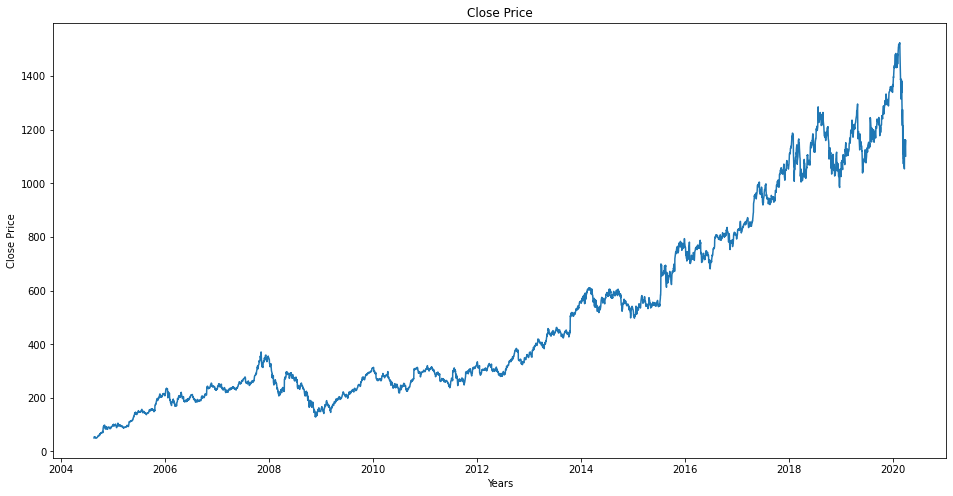

In [2]:
# setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title("Close Price")
plt.xlabel("Years")
plt.ylabel("Close Price")

From the above graph, data before 2010 (or 2015) doesn't seem to be very representive.

In [3]:
# discard data before year 2015
df = df[df['Date'] >= '2015-01-01']
df.drop('Date', axis=1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,532.599976,535.799988,527.880005,529.549988,529.549988,1324000
2015-01-05,527.150024,527.989990,517.750000,519.460022,519.460022,2059100
2015-01-06,520.500000,521.210022,505.549988,506.640015,506.640015,2722800
2015-01-07,510.950012,511.489990,503.649994,505.149994,505.149994,2345900
2015-01-08,501.510010,507.500000,495.019989,506.910004,506.910004,3652700
...,...,...,...,...,...,...
2020-03-26,1114.719971,1171.479980,1092.030029,1162.920044,1162.920044,3828100
2020-03-27,1127.469971,1151.050049,1104.000000,1110.260010,1110.260010,3139700
2020-03-30,1132.640015,1151.000000,1098.489990,1146.310059,1146.310059,2936800


## Daily with 1 step and 5 steps, with or without Volume

In [4]:
df_processed = df.copy()

# leave Close only
df_processed = df_processed[['Close', 'Volume']]

num_lags = 5 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df_processed:
    for lag in range(1,num_lags+1):
        df_processed[column + '_lag' + str(lag)] = df_processed[column].shift(lag*-1-(delay-1))      

df_processed.drop('Volume', axis=1)
df_processed.dropna(inplace=True)

df_processed

,Close,Volume,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5
Date,,,,,,,,,,,,
2015-01-02,529.549988,1324000,519.460022,506.640015,505.149994,506.910004,500.720001,2059100.0,2722800.0,2345900.0,3652700.0,2100000.0
2015-01-05,519.460022,2059100,506.640015,505.149994,506.910004,500.720001,497.059998,2722800.0,2345900.0,3652700.0,2100000.0,2856900.0
2015-01-06,506.640015,2722800,505.149994,506.910004,500.720001,497.059998,501.799988,2345900.0,3652700.0,2100000.0,2856900.0,3047900.0
2015-01-07,505.149994,2345900,506.910004,500.720001,497.059998,501.799988,505.929993,3652700.0,2100000.0,2856900.0,3047900.0,2640000.0
2015-01-08,506.910004,3652700,500.720001,497.059998,501.799988,505.929993,504.010010,2100000.0,2856900.0,3047900.0,2640000.0,2553400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-19,1111.670044,3703200,1068.209961,1054.130005,1130.010010,1101.619995,1162.920044,4143900.0,4183600.0,3623400.0,4516200.0,3828100.0
2020-03-20,1068.209961,4143900,1054.130005,1130.010010,1101.619995,1162.920044,1110.260010,4183600.0,3623400.0,4516200.0,3828100.0,3139700.0
2020-03-23,1054.130005,4183600,1130.010010,1101.619995,1162.920044,1110.260010,1146.310059,3623400.0,4516200.0,3828100.0,3139700.0,2936800.0


In [5]:
df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.7),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.7):,:]

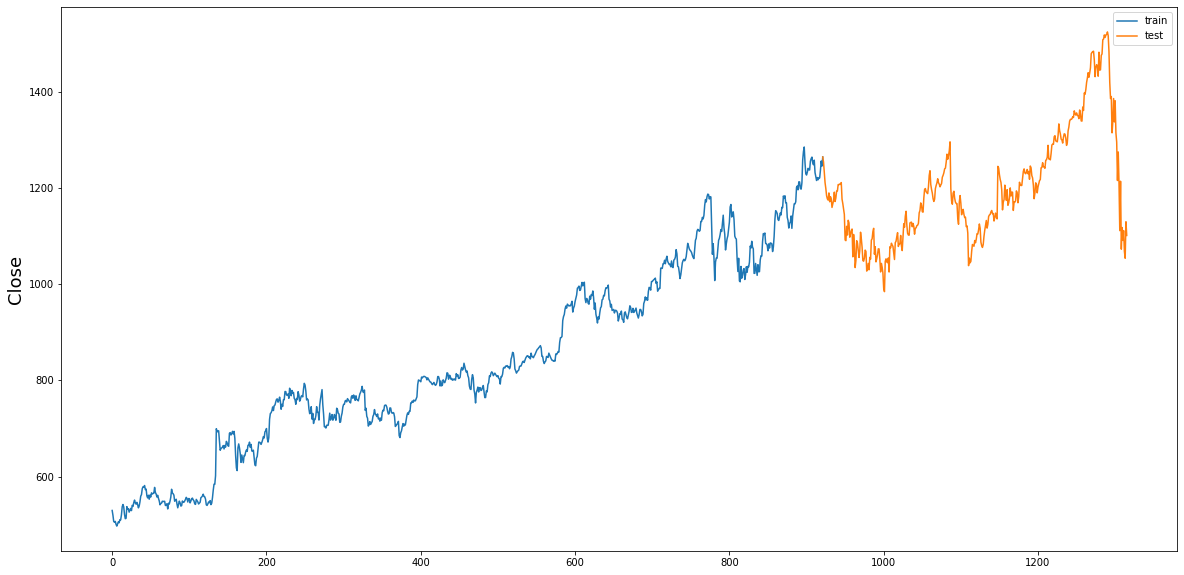

In [6]:
plt.plot(df_train.index,df_train['Close'])
plt.plot(df_test.index,df_test['Close'])
plt.ylabel('Close',fontsize=18)
plt.legend(['train','test'])
plt.show()

### Data Splitting

In [7]:
# 1 step Close only
x_train_lag1 = df_train[['Close_lag1']]

# 1 step Close and Vol
mask_lag1_with_vol = df_train.columns.str.contains('lag1')
x_train_lag1_with_vol = df_train[df_train.columns[mask_lag1_with_vol]]

# 5 steps Close only
mask_lag5 = df_train.columns.str.contains('Close_lag')
x_train_lag5 = df_train[df_train.columns[mask_lag5]]

# 5 step Close and Vol
x_train_lag5_with_vol = df_train.drop('Close', axis=1)

y_train = df_train['Close']

### Test Data ###
# 1 step Close only
x_test_lag1 = df_test[['Close_lag1']]

# 1 step Close and Vol
x_test_lag1_with_vol = df_test[df_test.columns[mask_lag1_with_vol]]

# 5 steps Close only
x_test_lag5 = df_test[df_test.columns[mask_lag5]]

# 5 step Close and Vol
x_test_lag5_with_vol = df_test.drop('Close', axis=1)

y_test = df_test['Close']

In [8]:
# implement linear regression
from sklearn.linear_model import LinearRegression
# 1 step Close only
model_lag1 = LinearRegression()
model_lag1.fit(x_train_lag1, y_train)

# 1 step Close and Vol
model_lag1_with_vol = LinearRegression()
model_lag1_with_vol.fit(x_train_lag1_with_vol, y_train)

# 5 steps Close only
model_lag5 = LinearRegression()
model_lag5.fit(x_train_lag5, y_train)

# 5 steps Close and Vol
model_lag5_with_vol = LinearRegression()
model_lag5_with_vol.fit(x_train_lag5_with_vol, y_train)

# make predictions and find the rmse
preds_lag1 = model_lag1.predict(x_test_lag1)
preds_lag1_with_vol = model_lag1_with_vol.predict(x_test_lag1_with_vol)
preds_lag5 = model_lag5.predict(x_test_lag5)
preds_lag5_with_vol = model_lag5_with_vol.predict(x_test_lag5_with_vol)

rms_lag1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1)),2)))
rms_lag1_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1_with_vol)),2)))
rms_lag5=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5)),2)))
rms_lag5_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5_with_vol)),2)))

print('rms_lag1: ', rms_lag1)
print('rms_lag1_with_vol: ', rms_lag1_with_vol)
print('rms_lag5: ', rms_lag5)
print('rms_lag5_with_vol: ', rms_lag5_with_vol)

rms_lag1:  23.85480694345757
rms_lag1_with_vol:  23.855572359544965
rms_lag5:  24.38336854883795
rms_lag5_with_vol:  24.360109571171577


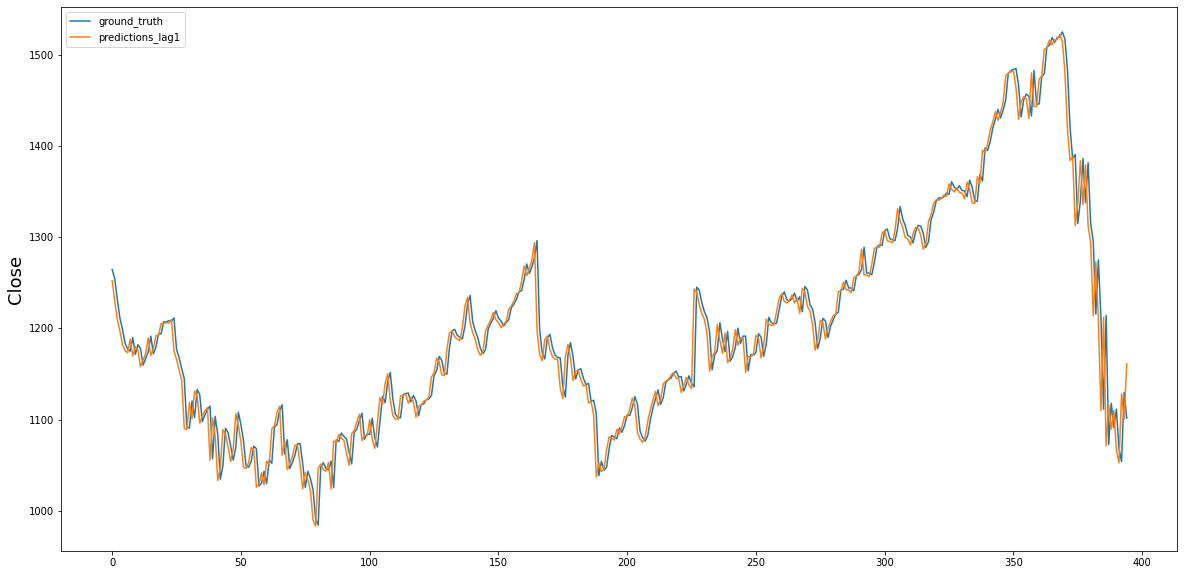

In [9]:
# plot 1 step Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag1'] = preds_lag1

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag1'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag1'])
plt.show()

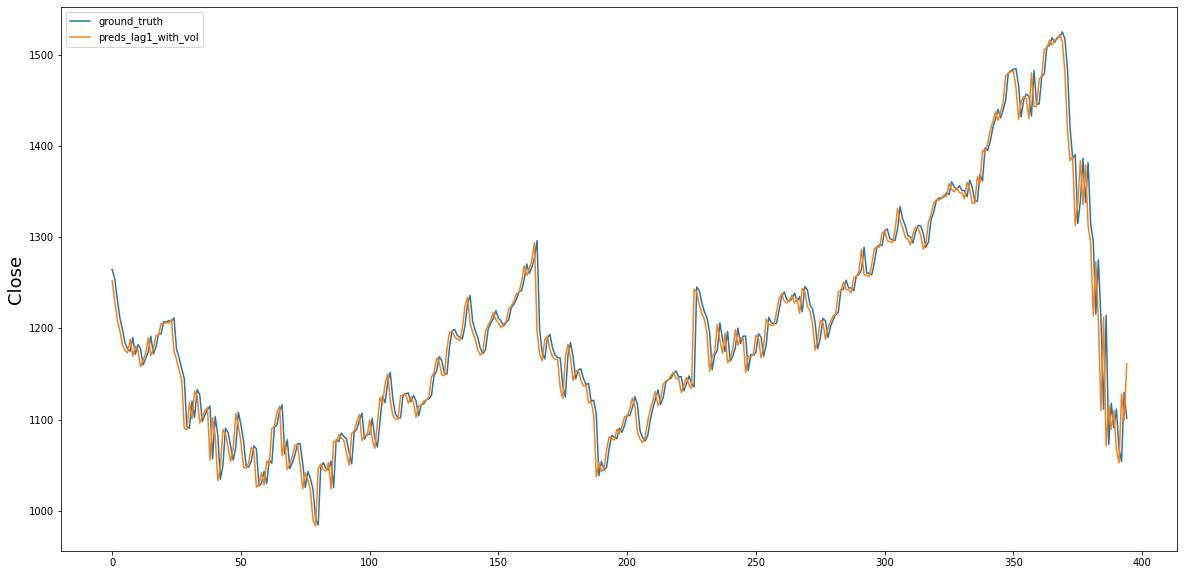

In [10]:
# plot 1 step Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag1_with_vol'] = preds_lag1_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag1_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag1_with_vol'])
plt.show()

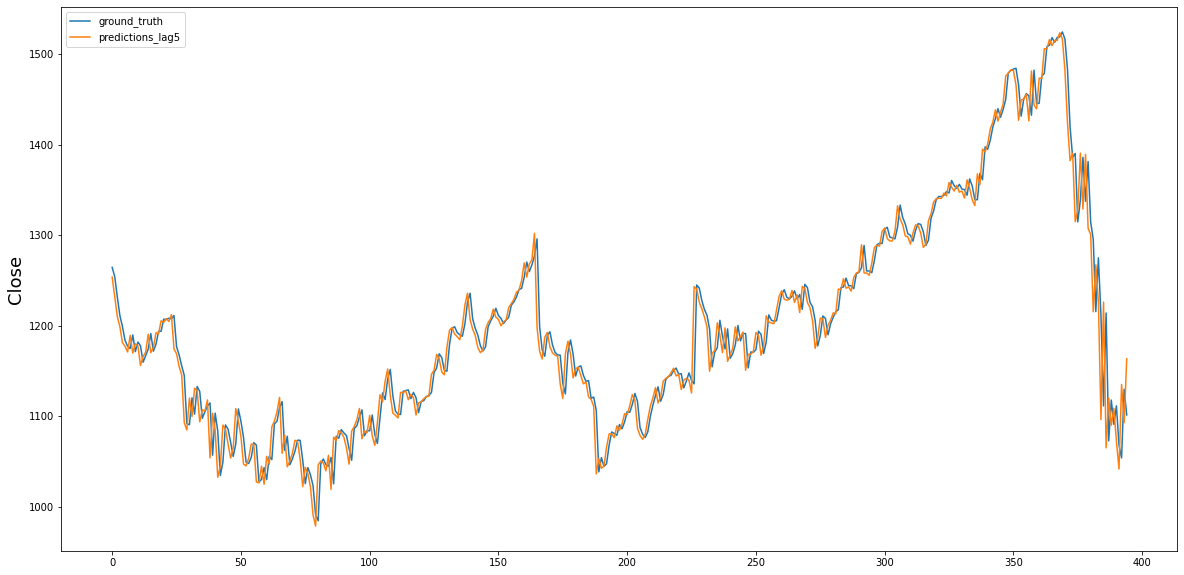

In [11]:
# Plot 5 steps Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag5'] = preds_lag5

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag5'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag5'])
plt.show()

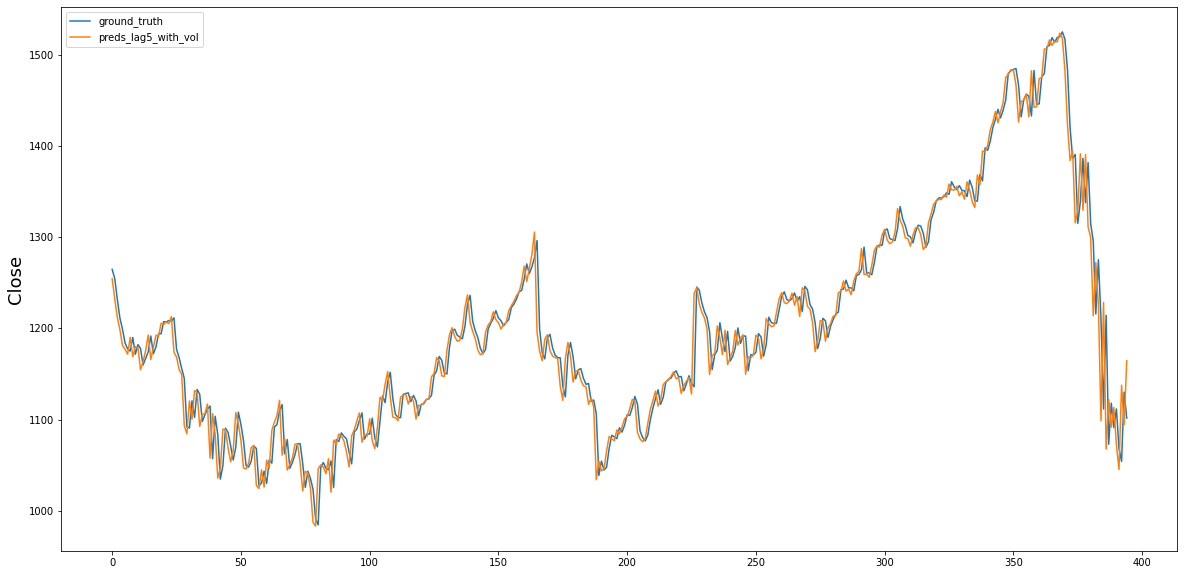

In [12]:
# Plot 5 steps Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag5_with_vol'] = preds_lag5_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag5_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag5_with_vol'])
plt.show()

## Weekly

In [13]:
df_weekly = df.resample('W').mean()
df_weekly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-04,532.599976,535.799988,527.880005,529.549988,529.549988,1.324000e+06
2015-01-11,513.658008,515.358002,504.123993,507.776007,507.776007,2.576100e+06
2015-01-18,502.854004,507.548004,498.286005,503.851996,503.851996,2.716220e+06
2015-01-25,521.160011,530.427490,519.154991,527.395004,527.395004,2.439825e+06
2015-02-01,525.960010,531.652002,517.387994,524.223987,524.223987,3.060280e+06
...,...,...,...,...,...,...
2020-03-08,1344.706006,1366.963989,1310.057983,1343.227979,1343.227979,2.786500e+06
2020-03-15,1201.045996,1237.732007,1164.890015,1205.536035,1205.536035,3.525820e+06
2020-03-22,1091.861987,1133.509985,1054.165991,1092.426001,1092.426001,4.297000e+06


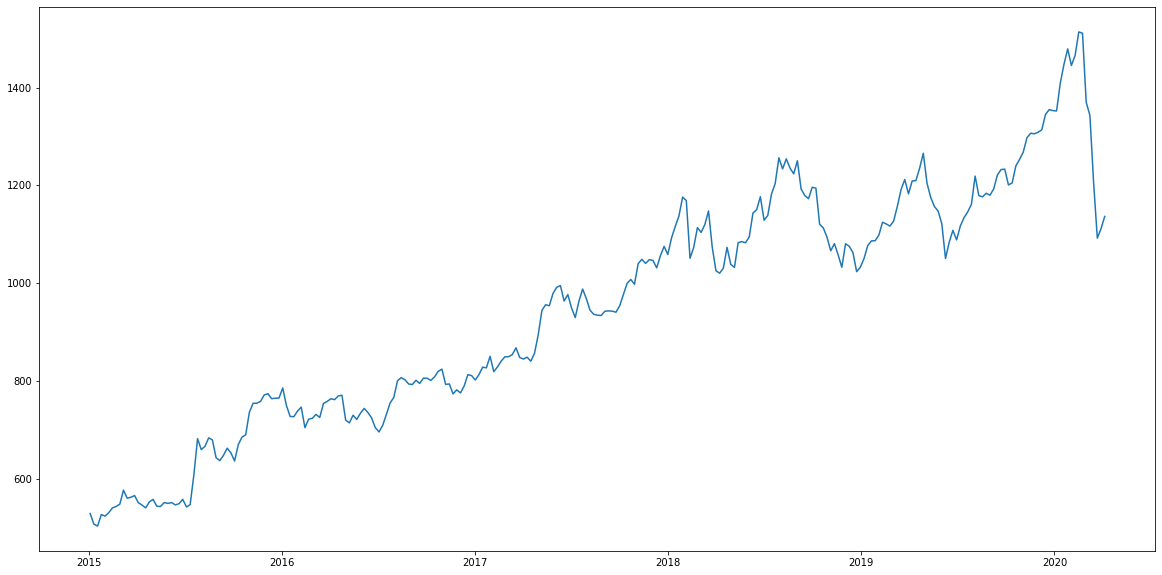

In [14]:
plt.plot(df_weekly['Close'], label='Close Price Weekly')

In [15]:
df_processed = df_weekly.copy()

# leave Close only
df_processed = df_processed[['Close', 'Volume']]

num_lags = 5 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df_processed:
    for lag in range(1,num_lags+1):
        df_processed[column + '_lag' + str(lag)] = df_processed[column].shift(lag*-1-(delay-1))      

df_processed.drop('Volume', axis=1)
df_processed.dropna(inplace=True)

df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.7),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.7):,:]

# 1 step Close only
x_train_lag1 = df_train[['Close_lag1']]

# 1 step Close and Vol
mask_lag1_with_vol = df_train.columns.str.contains('lag1')
x_train_lag1_with_vol = df_train[df_train.columns[mask_lag1_with_vol]]

# 5 steps Close only
mask_lag5 = df_train.columns.str.contains('Close_lag')
x_train_lag5 = df_train[df_train.columns[mask_lag5]]

# 5 step Close and Vol
x_train_lag5_with_vol = df_train.drop('Close', axis=1)

y_train = df_train['Close']

### Test Data ###
# 1 step Close only
x_test_lag1 = df_test[['Close_lag1']]

# 1 step Close and Vol
x_test_lag1_with_vol = df_test[df_test.columns[mask_lag1_with_vol]]

# 5 steps Close only
x_test_lag5 = df_test[df_test.columns[mask_lag5]]

# 5 step Close and Vol
x_test_lag5_with_vol = df_test.drop('Close', axis=1)

y_test = df_test['Close']

# implement linear regression
from sklearn.linear_model import LinearRegression
# 1 step Close only
model_lag1 = LinearRegression()
model_lag1.fit(x_train_lag1, y_train)

# 1 step Close and Vol
model_lag1_with_vol = LinearRegression()
model_lag1_with_vol.fit(x_train_lag1_with_vol, y_train)

# 5 steps Close only
model_lag5 = LinearRegression()
model_lag5.fit(x_train_lag5, y_train)

# 5 steps Close and Vol
model_lag5_with_vol = LinearRegression()
model_lag5_with_vol.fit(x_train_lag5_with_vol, y_train)

# make predictions and find the rmse
preds_lag1 = model_lag1.predict(x_test_lag1)
preds_lag1_with_vol = model_lag1_with_vol.predict(x_test_lag1_with_vol)
preds_lag5 = model_lag5.predict(x_test_lag5)
preds_lag5_with_vol = model_lag5_with_vol.predict(x_test_lag5_with_vol)

rms_lag1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1)),2)))
rms_lag1_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1_with_vol)),2)))
rms_lag5=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5)),2)))
rms_lag5_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5_with_vol)),2)))

print('rms_lag1: ', rms_lag1)
print('rms_lag1_with_vol: ', rms_lag1_with_vol)
print('rms_lag5: ', rms_lag5)
print('rms_lag5_with_vol: ', rms_lag5_with_vol)

rms_lag1:  31.868204543467723
rms_lag1_with_vol:  30.917449326901277
rms_lag5:  32.84140760885499
rms_lag5_with_vol:  31.685375352487906


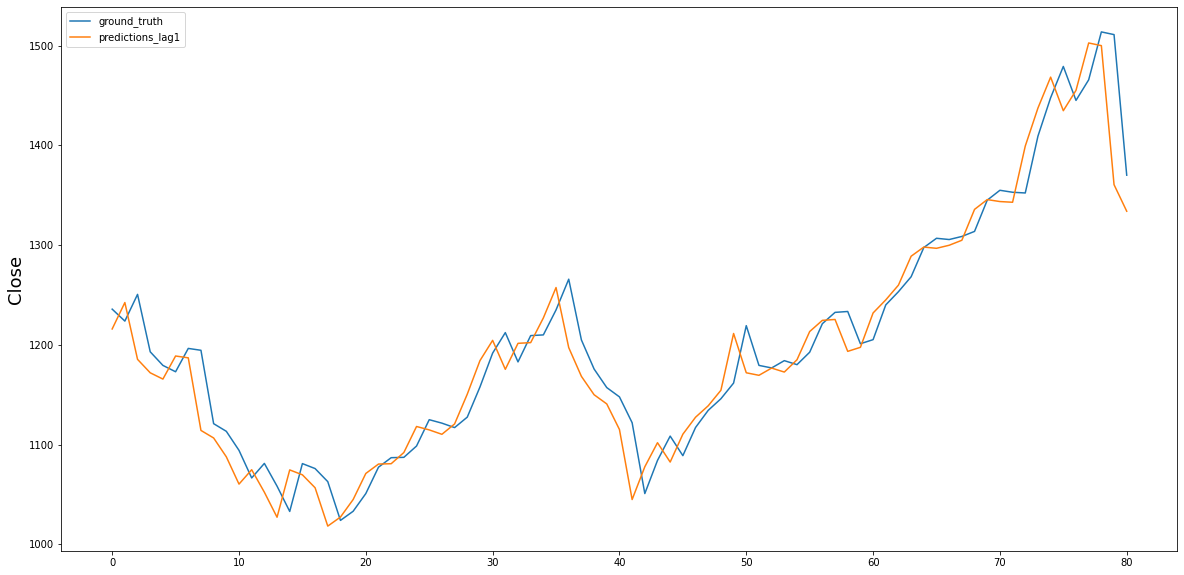

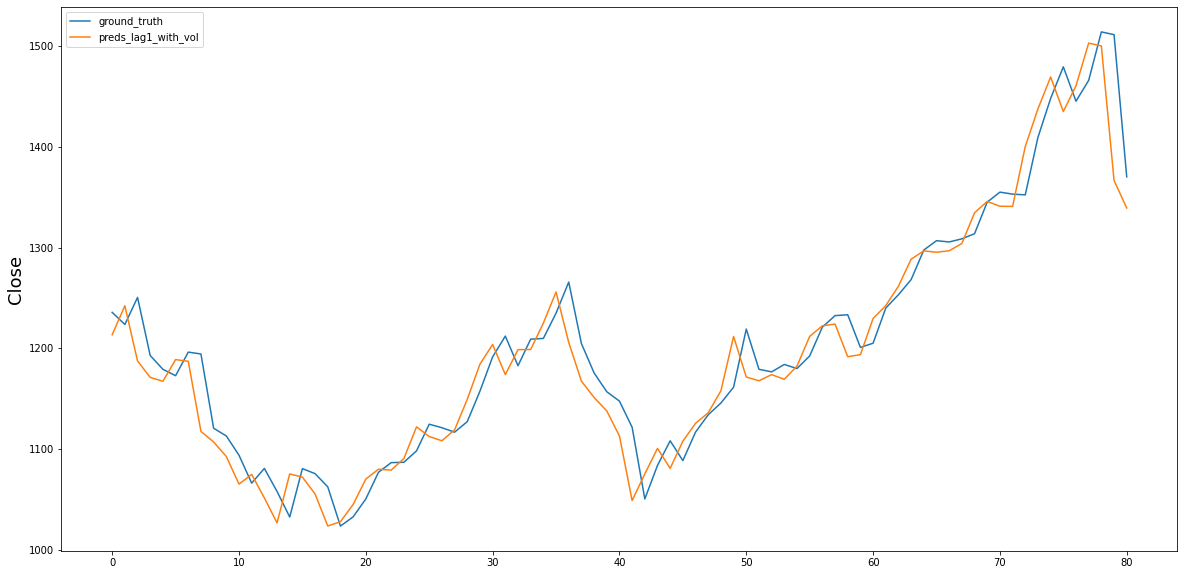

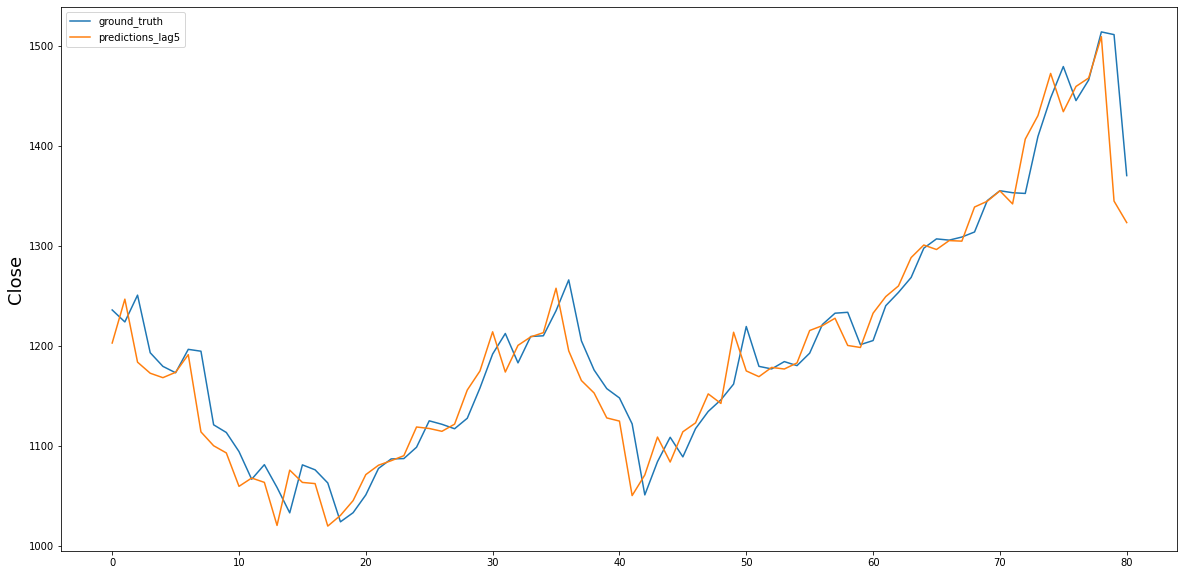

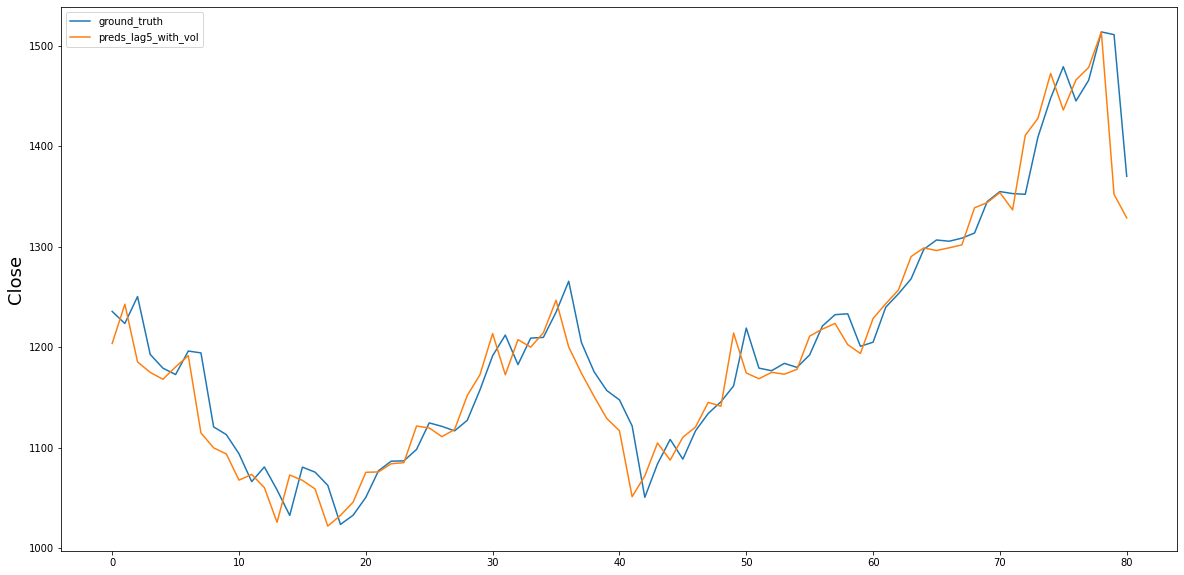

In [16]:
# plot 1 step Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag1'] = preds_lag1

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag1'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag1'])
plt.show()

# plot 1 step Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag1_with_vol'] = preds_lag1_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag1_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag1_with_vol'])
plt.show()

# Plot 5 steps Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag5'] = preds_lag5

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag5'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag5'])
plt.show()

# Plot 5 steps Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag5_with_vol'] = preds_lag5_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag5_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag5_with_vol'])
plt.show()

## Monthly

In [17]:
df_monthly = df.resample('M').mean()
df_monthly

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-31,516.480006,521.514999,510.174496,515.919498,515.919498,2.642315e+06
2015-02-28,539.176841,544.848948,535.208422,540.985792,540.985792,2.127332e+06
2015-03-31,566.354994,570.566367,561.694544,565.965906,565.965906,1.963964e+06
2015-04-30,549.896667,554.367618,544.975714,549.482384,549.482384,2.083095e+06
2015-05-31,548.042499,551.744501,543.734494,547.676501,547.676501,1.621085e+06
...,...,...,...,...,...,...
2019-12-31,1341.275722,1348.064285,1333.763329,1340.990944,1340.990944,1.331205e+06
2020-01-31,1433.227615,1444.498093,1423.516195,1436.159528,1436.159528,1.603795e+06
2020-02-29,1461.980000,1478.324212,1446.527903,1462.853676,1462.853676,2.187411e+06


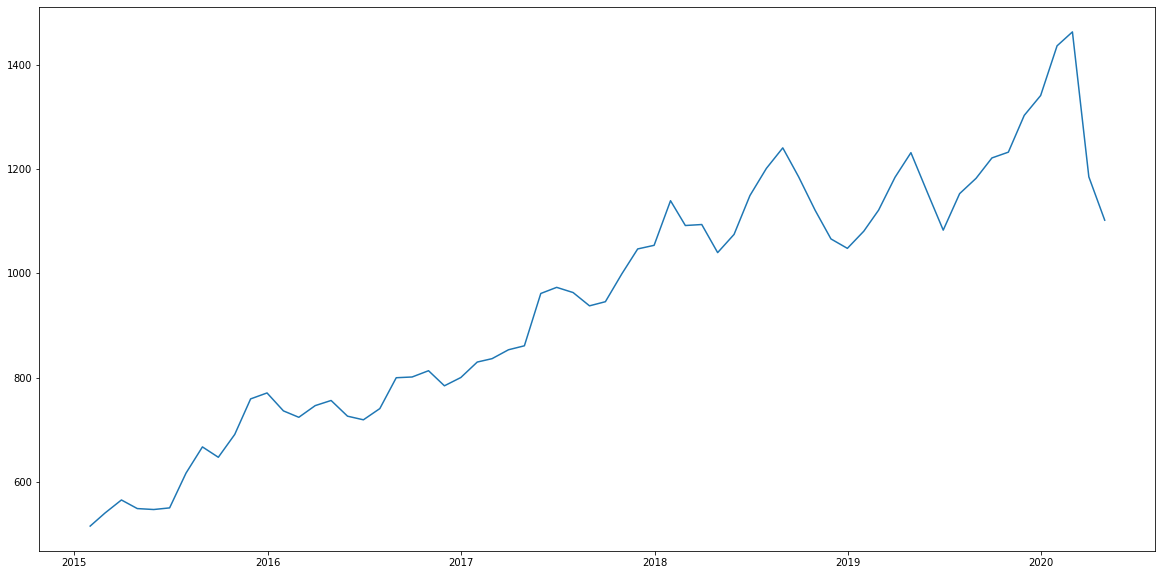

In [18]:
plt.plot(df_monthly['Close'], label='Close Price Monthly')

In [19]:
df_processed = df_monthly.copy()

# leave Close only
df_processed = df_processed[['Close', 'Volume']]

num_lags = 5 # number of lags and window lenghts for mean aggregation
delay = 1 # predict target one step ahead
for column in df_processed:
    for lag in range(1,num_lags+1):
        df_processed[column + '_lag' + str(lag)] = df_processed[column].shift(lag*-1-(delay-1))      

df_processed.drop('Volume', axis=1)
df_processed.dropna(inplace=True)

df_processed.reset_index(drop=True,inplace=True)
df_train = df_processed.loc[:int(df_processed.shape[0]*0.7),:]
df_test = df_processed.loc[int(df_processed.shape[0]*0.7):,:]

# 1 step Close only
x_train_lag1 = df_train[['Close_lag1']]

# 1 step Close and Vol
mask_lag1_with_vol = df_train.columns.str.contains('lag1')
x_train_lag1_with_vol = df_train[df_train.columns[mask_lag1_with_vol]]

# 5 steps Close only
mask_lag5 = df_train.columns.str.contains('Close_lag')
x_train_lag5 = df_train[df_train.columns[mask_lag5]]

# 5 step Close and Vol
x_train_lag5_with_vol = df_train.drop('Close', axis=1)

y_train = df_train['Close']

### Test Data ###
# 1 step Close only
x_test_lag1 = df_test[['Close_lag1']]

# 1 step Close and Vol
x_test_lag1_with_vol = df_test[df_test.columns[mask_lag1_with_vol]]

# 5 steps Close only
x_test_lag5 = df_test[df_test.columns[mask_lag5]]

# 5 step Close and Vol
x_test_lag5_with_vol = df_test.drop('Close', axis=1)

y_test = df_test['Close']

# implement linear regression
from sklearn.linear_model import LinearRegression
# 1 step Close only
model_lag1 = LinearRegression()
model_lag1.fit(x_train_lag1, y_train)

# 1 step Close and Vol
model_lag1_with_vol = LinearRegression()
model_lag1_with_vol.fit(x_train_lag1_with_vol, y_train)

# 5 steps Close only
model_lag5 = LinearRegression()
model_lag5.fit(x_train_lag5, y_train)

# 5 steps Close and Vol
model_lag5_with_vol = LinearRegression()
model_lag5_with_vol.fit(x_train_lag5_with_vol, y_train)

# make predictions and find the rmse
preds_lag1 = model_lag1.predict(x_test_lag1)
preds_lag1_with_vol = model_lag1_with_vol.predict(x_test_lag1_with_vol)
preds_lag5 = model_lag5.predict(x_test_lag5)
preds_lag5_with_vol = model_lag5_with_vol.predict(x_test_lag5_with_vol)

rms_lag1=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1)),2)))
rms_lag1_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag1_with_vol)),2)))
rms_lag5=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5)),2)))
rms_lag5_with_vol=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lag5_with_vol)),2)))

print('rms_lag1: ', rms_lag1)
print('rms_lag1_with_vol: ', rms_lag1_with_vol)
print('rms_lag5: ', rms_lag5)
print('rms_lag5_with_vol: ', rms_lag5_with_vol)

rms_lag1:  52.3710874185574
rms_lag1_with_vol:  50.88086798161093
rms_lag5:  54.95387618126545
rms_lag5_with_vol:  54.58404901439207


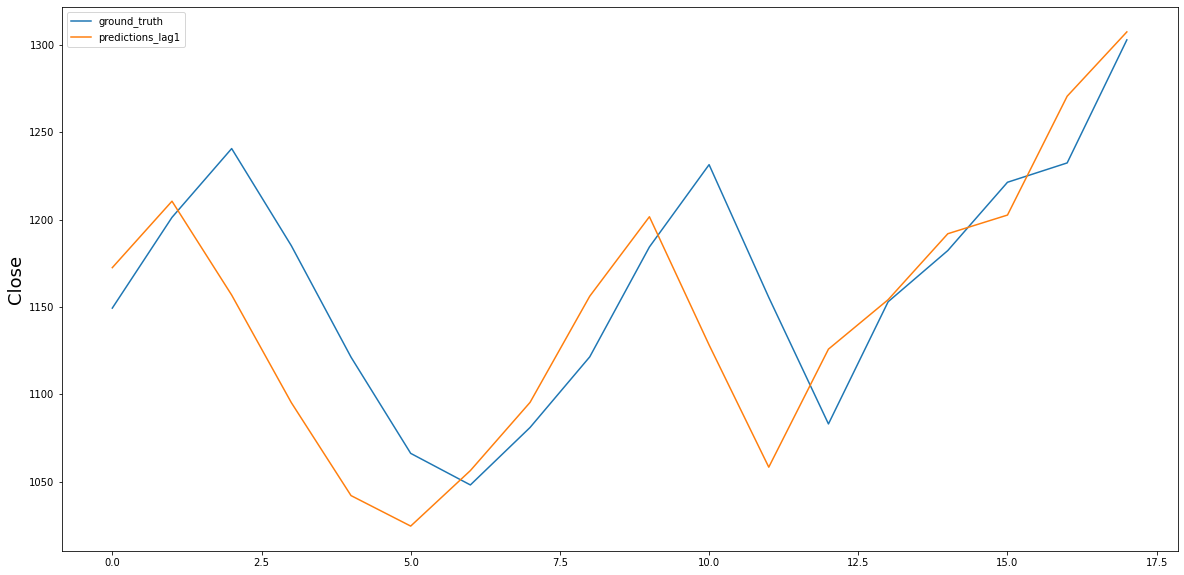

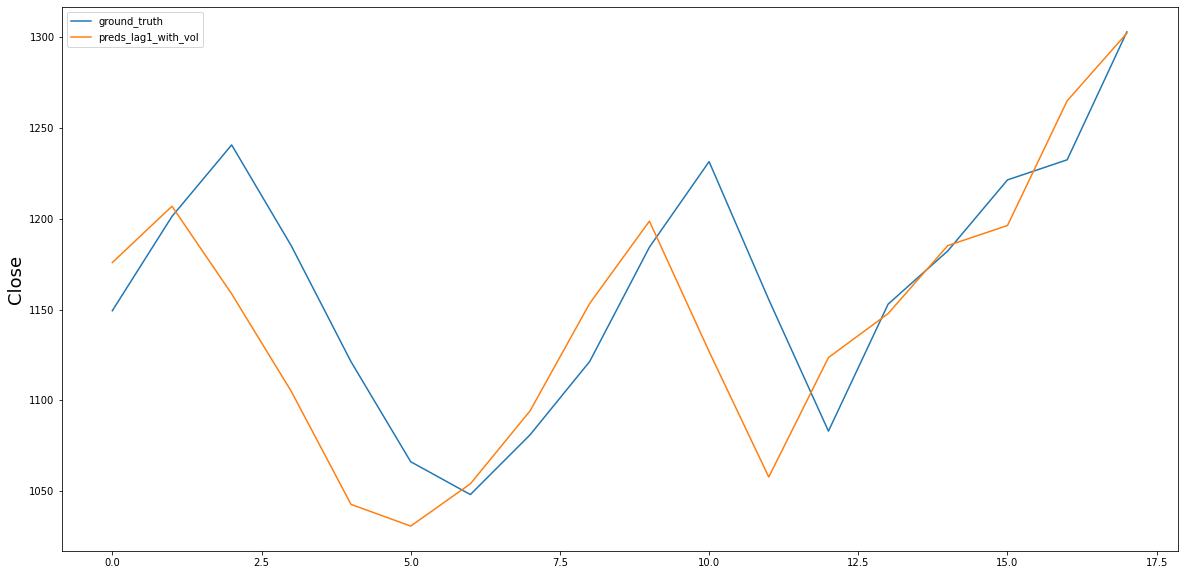

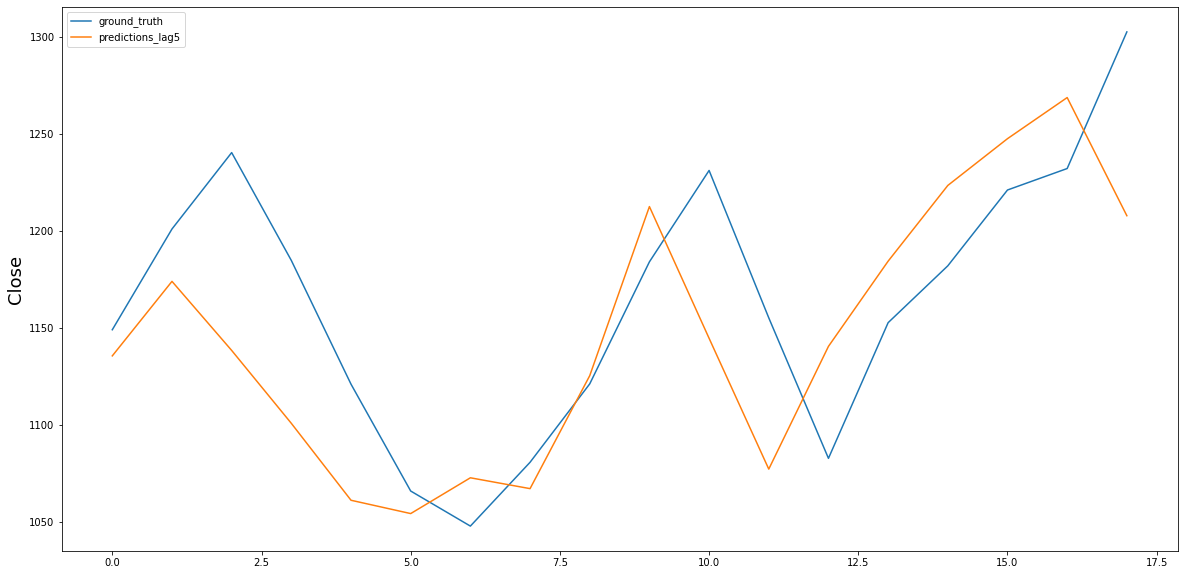

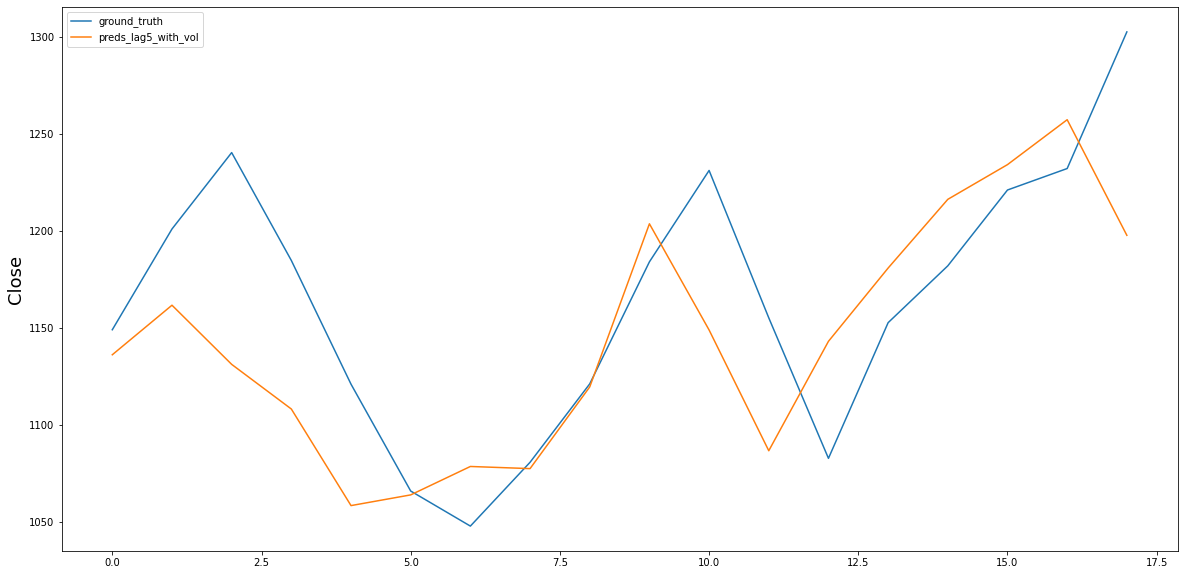

In [20]:
# plot 1 step Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag1'] = preds_lag1

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag1'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag1'])
plt.show()

# plot 1 step Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag1_with_vol'] = preds_lag1_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag1_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag1_with_vol'])
plt.show()

# Plot 5 steps Close only
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['predictions_lag5'] = preds_lag5

plt.plot(df_results['ground_truth'])
plt.plot(df_results['predictions_lag5'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','predictions_lag5'])
plt.show()

# Plot 5 steps Close and Vol
df_results = pd.DataFrame()
df_results['ground_truth'] = df_test['Close'].reset_index(drop=True)
df_results['preds_lag5_with_vol'] = preds_lag5_with_vol

plt.plot(df_results['ground_truth'])
plt.plot(df_results['preds_lag5_with_vol'])

plt.ylabel('Close',fontsize=18)
plt.legend(['ground_truth','preds_lag5_with_vol'])
plt.show()